# Normal equation

Average error for normal equation: 481.47939131351865


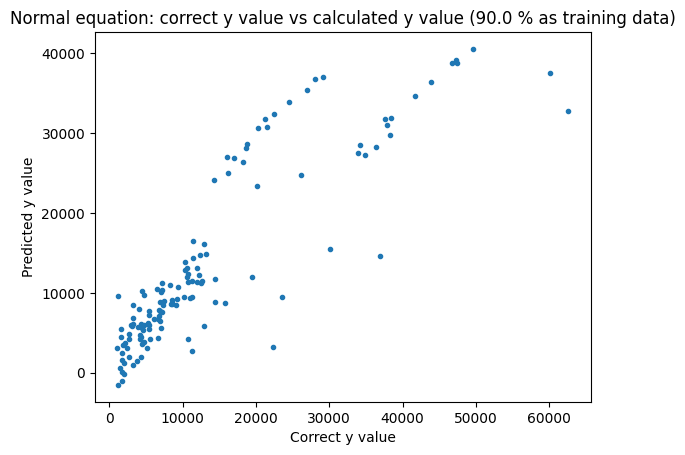

Normal equation took 0.00020658000005369104 ms.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tabulate import tabulate
import time

PROYECT_HOME = os.path.join("")


def add_ones_col(x: np.ndarray) -> np.ndarray:
    return np.append(np.ones((x.shape[0], 1)), x, axis=1)


def normal_equation(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    x_c = add_ones_col(x)
    return np.linalg.inv(x_c.T @ x_c) @ x_c.T @ y


def prepare_data(insurance_df: pd.DataFrame) -> pd.DataFrame:
    # sex: male = 1, female = 0
    insurance_df["sex"] = np.where(insurance_df["sex"] == "male", 1, 0)

    # smoker: yes = 1, no = 0
    insurance_df["smoker"] = np.where(insurance_df["smoker"] == "yes", 1, 0)

    # field region: northeast: 0, northwest: 1, southeast: 2,  southwest: 3
    region_map = {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3}
    insurance_df["region"] = insurance_df["region"].map(region_map)

    return insurance_df


def get_train_test_data(
    insurace_df: pd.DataFrame, training_data_percentage: float
) -> tuple[np.ndarray, np.ndarray]:
    no_points = insurace_df.shape[0]

    no_training_points = int(training_data_percentage * no_points)

    insurace_df_numpy = insurace_df.to_numpy()

    training_points = insurace_df_numpy[0:no_training_points]
    testing_points = insurace_df_numpy[no_training_points:]

    return training_points, testing_points


def separate_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    return data[:, :-1], data[:, data.shape[1] - 1].reshape(-1, 1)


def log_results(predicted_data_y: np.ndarray, testing_data_y: np.ndarray) -> None:
    cols = ["Expected", "Calculated", "Error percentage"]
    data: list[list] = []

    for i in range(predicted_data_y.shape[0]):
        expected_value = testing_data_y[i, 0]
        calculated_value = predicted_data_y[i, 0]
        error_percentage = expected_value / calculated_value * 100

        data.append([expected_value, calculated_value, error_percentage])

    with open(
        os.path.join(PROYECT_HOME, "results", "insurance_normal_equation"), "w"
    ) as file:
        file.write(tabulate(data, headers=cols, tablefmt="grid"))


def plot_results(
    predicted_data_y: np.ndarray,
    testing_data_y: np.ndarray,
    training_data_percentage: float,
) -> None:
    plt.plot(testing_data_y, predicted_data_y, ".")
    plt.title(
        f"Normal equation: correct y value vs calculated y value ({training_data_percentage*100} % as training data)"
    )
    plt.xlabel("Correct y value")
    plt.ylabel("Predicted y value")
    plt.show()


def main():
    csv_file = os.path.join(PROYECT_HOME, "data", "insurance.csv")
    insurance_df = pd.read_csv(csv_file)

    insurance_df = prepare_data(insurance_df)

    training_data_percentage = 0.9
    training_data, testing_data = get_train_test_data(
        insurance_df, training_data_percentage
    )

    training_data_x, training_data_y = separate_data(training_data)
    testing_data_x, testing_data_y = separate_data(testing_data)

    
    start_time = time.perf_counter()
    theta = normal_equation(training_data_x, training_data_y)
    end_time = time.perf_counter()

    testing_data_x_c = add_ones_col(testing_data_x)
    predicted_data_y = testing_data_x_c @ theta

    average_error = np.sum(np.abs(predicted_data_y - testing_data_y)) / training_data_y.shape[0]  # type: ignore
    print(f"Average error for normal equation: {average_error}")

    log_results(predicted_data_y, testing_data_y)
    plot_results(predicted_data_y, testing_data_y, training_data_percentage)
    print(f"Normal equation took {end_time - start_time} ms.")


if __name__ == "__main__":
    main()

# Batch gradient descent

Average error for batch gradient descent: 603.2846839845203. (Learning rate: 0.0007. Iterations: 10000)


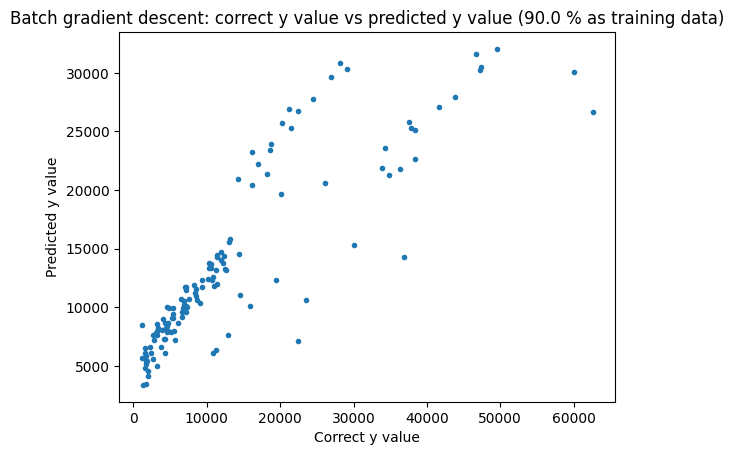

Batch gradient descent took 0.14296543199998268 ms.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tabulate import tabulate
import logging
import time

PROYECT_HOME = os.path.join("")


logging.basicConfig(level=logging.INFO)
logging.disable()


def add_ones_col(x: np.ndarray) -> np.ndarray:
    return np.append(np.ones((x.shape[0], 1)), x, axis=1)


def prepare_data(insurance_df: pd.DataFrame) -> pd.DataFrame:
    # sex: male = 1, female = 0
    insurance_df["sex"] = np.where(insurance_df["sex"] == "male", 1, 0)

    # smoker: yes = 1, no = 0
    insurance_df["smoker"] = np.where(insurance_df["smoker"] == "yes", 1, 0)

    # field region: northeast: 0, northwest: 1, southeast: 2,  southwest: 3
    region_map = {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3}
    insurance_df["region"] = insurance_df["region"].map(region_map)

    return insurance_df


def get_train_test_data(
    insurace_df: pd.DataFrame, training_data_percentage: float
) -> tuple[np.ndarray, np.ndarray]:
    no_points = insurace_df.shape[0]

    no_training_points = int(training_data_percentage * no_points)

    insurace_df_numpy = insurace_df.to_numpy()

    training_points = insurace_df_numpy[0:no_training_points]
    testing_points = insurace_df_numpy[no_training_points:]

    return training_points, testing_points


def separate_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    return data[:, :-1], data[:, data.shape[1] - 1].reshape(-1, 1)


def log_results(predicted_data_y: np.ndarray, testing_data_y: np.ndarray) -> None:
    cols = ["Expected", "Calculated", "Error percentage"]
    data: list[list] = []

    for i in range(predicted_data_y.shape[0]):
        expected_value = testing_data_y[i, 0]
        calculated_value = predicted_data_y[i, 0]
        error_percentage = expected_value / calculated_value * 100

        data.append([expected_value, calculated_value, error_percentage])

    with open(
        os.path.join(PROYECT_HOME, "results", "insurance_batch_gradient_descent"), "w"
    ) as file:
        file.write(tabulate(data, headers=cols, tablefmt="grid"))


def plot_results(
    predicted_data_y: np.ndarray,
    testing_data_y: np.ndarray,
    training_data_percentage: float,
) -> None:
    plt.plot(testing_data_y, predicted_data_y, ".")
    plt.title(
        f"Batch gradient descent: correct y value vs predicted y value ({training_data_percentage*100} % as training data)"
    )
    plt.xlabel("Correct y value")
    plt.ylabel("Predicted y value")
    plt.show()


def batch_gradient_descent(
    training_data_x: np.ndarray,
    training_data_y: np.ndarray,
    iterations: int,
    learning_rate: float,
) -> np.ndarray:
    training_data_x_c = add_ones_col(training_data_x)
    theta = np.random.randn(training_data_x_c.shape[1], 1)
    n = training_data_x_c.shape[0]

    for _ in range(iterations):
        multi = training_data_x_c @ theta - training_data_y
        gradients = (((1 / n) * learning_rate) * training_data_x_c.T) @ multi

        logging.info(f"training_data_x_c shape: {training_data_x_c.shape}")
        logging.info(f"theta shape: {theta.shape}")
        logging.info(f"training_data_y shape: {training_data_y.shape}")
        logging.info(f"multi shape: {multi.shape}")
        logging.info(f"gradients shape: {gradients.shape}")

        theta -= gradients

    return theta


def main():
    csv_file = os.path.join(PROYECT_HOME, "data", "insurance.csv")
    insurance_df = pd.read_csv(csv_file)

    insurance_df = prepare_data(insurance_df)

    training_data_percentage = 0.9
    training_data, testing_data = get_train_test_data(
        insurance_df, training_data_percentage
    )

    training_data_x, training_data_y = separate_data(training_data)
    testing_data_x, testing_data_y = separate_data(testing_data)

    learning_rate = 0.0007
    iterations = 10_000
    
    start_time = time.perf_counter()
    theta = batch_gradient_descent(
        training_data_x, training_data_y, iterations, learning_rate
    )
    end_time = time.perf_counter()

    testing_data_x_c = add_ones_col(testing_data_x)
    predicted_data_y = testing_data_x_c @ theta

    average_error = np.sum(np.abs(predicted_data_y - testing_data_y)) / training_data_y.shape[0]  # type: ignore
    print(
        f"Average error for batch gradient descent: {average_error}. (Learning rate: {learning_rate}. Iterations: {iterations})"
    )

    log_results(predicted_data_y, testing_data_y)
    plot_results(predicted_data_y, testing_data_y, training_data_percentage)
    print(f"Batch gradient descent took {end_time - start_time} ms.")


if __name__ == "__main__":
    main()